In [27]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.layers import Input, LSTM, Dense, Dropout, Bidirectional, MaxPooling1D, Conv1D, TimeDistributed, Flatten, ConvLSTM2D, RepeatVector, TimeDistributed

# Load the data
df = pd.read_csv("JapanLandTemperature.csv", index_col='dt', parse_dates=True)

# Set the frequency of the DataFrame to the start of the month ('MS').
df = df.asfreq('MS')

# Identify columns that contain the word 'Uncertainty' in their name.
uncertainty_columns = df.filter(like='Uncertainty').columns

# Drop the identified uncertainty columns from the DataFrame.
df = df.drop(columns=uncertainty_columns)

# Split the data into train and test sets with 80% for training and 20% for testing
train_size = int(len(df) * 0.8)
Train = df['AverageTemperature'][:train_size]
Test = df['AverageTemperature'][train_size:]



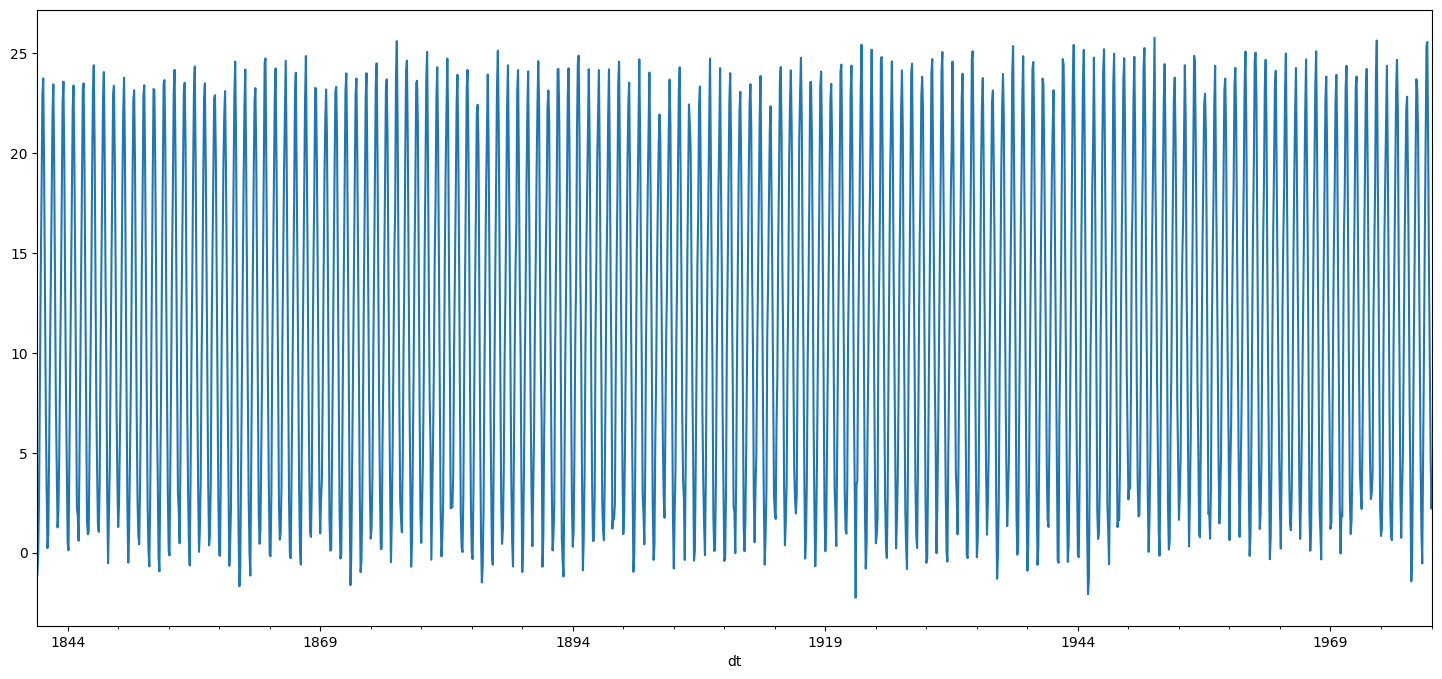

In [28]:
Train.plot(figsize=(18, 8));

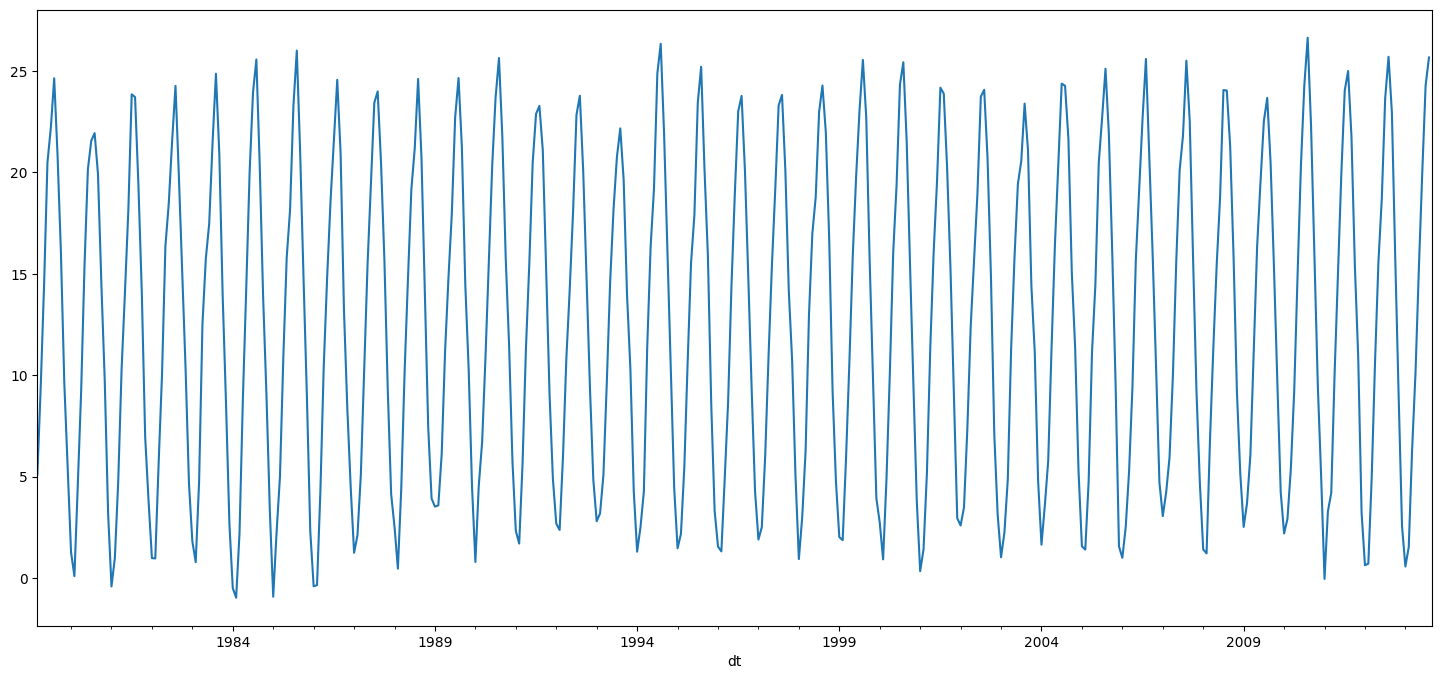

In [29]:
Test.plot(figsize=(18, 8));

In [30]:
train_set = Train.values.reshape(-1, 1)
test_set = Test.values.reshape(-1, 1)

In [31]:
train_set

array([[-1.1  ],
       [-0.079],
       [ 2.68 ],
       ...,
       [ 4.69 ],
       [ 2.197],
       [ 3.689]])

In [32]:
# It is always a good idea to normalize or scale data when using neural networks.
scaler = MinMaxScaler(feature_range=(0, 1))
train_set_scaled = scaler.fit_transform(train_set)

In [33]:
train_set_scaled

array([[0.04132644],
       [0.07773222],
       [0.17610982],
       ...,
       [0.24778035],
       [0.1588875 ],
       [0.21208772]])

In [34]:
train_set_scaled.shape

(1658, 1)

In [35]:
# Initialize lists to store feature sets and labels
features_set, labels = [], []

# Loop over the training data to create feature sets and labels
for i in range(60, len(train_set_scaled)):
    # Append the past 60 days' data to the features_set
    features_set.append(train_set_scaled[i-60:i, 0])
    # Append the current day's data to the labels
    labels.append(train_set_scaled[i, 0])

In [36]:
features_set, labels = np.array(features_set), np.array(labels)

In [37]:
features_set.shape

(1598, 60)

In [38]:
labels.shape

(1598,)

In [39]:
# LSTM expects three-dimensional input: (samples, time steps, features).
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))

In [40]:
# Fix seed for reproducibility
np.random.seed(100)
tf.random.set_seed(100)

# Initialize the model
model = Sequential()

# Add the first LSTM layer with Dropout regularization
model.add(LSTM(units=50, return_sequences=True, input_shape=(features_set.shape[1], 1)))
model.add(Dropout(0.2))

# Add the second LSTM layer with Dropout regularization
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

# Add the third LSTM layer with Dropout regularization
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

# Add the fourth LSTM layer without return sequences
model.add(LSTM(units=50))
model.add(Dropout(0.2))

# Add the output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model and store the history for plotting
history = model.fit(features_set, labels, epochs=100, batch_size=32, verbose=1)

# If you get the following error: NotImplementedError: Cannot convert a symbolic Tensor 
# Run the following code in anaconda prompt: conda install numpy=1.19

Epoch 1/100


C:\Users\yuta\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.1498
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0924
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0879
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0675
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0101
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0076
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0068
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0062
Epoch 9/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0057
Epoch 10/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0057
Epoch 11/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0053
Epoch 12/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0049
Epoch 13/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0056
Epoch 14/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0051
Epoch 15/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0049
E

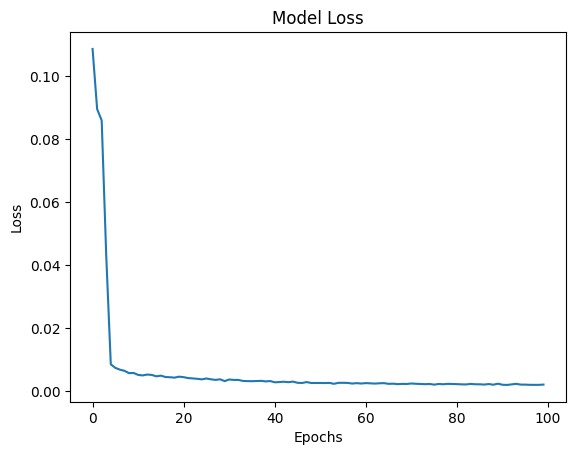

In [47]:
# Plot the loss over epochs
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [48]:
train_set_scaled

array([[0.04132644],
       [0.07773222],
       [0.17610982],
       ...,
       [0.24778035],
       [0.1588875 ],
       [0.21208772]])

In [43]:
# Fetch the last 60 days of training data
last_60_days_train = train_set[-60:]

# Concatenate the last 60 days of training data with the test data
test_inputs = np.concatenate((last_60_days_train, test_set), axis=0)

In [44]:
# Scale test inputs
test_set_scaled = scaler.transform(test_inputs)

# Prepare test features for prediction
test_features = []
for i in range(60, len(test_inputs)):
    test_features.append(test_set_scaled[i-60:i, 0])

# Convert test features to a numpy array and reshape for LSTM model
test_features = np.array(test_features)
test_features = test_features.reshape(test_features.shape[0], test_features.shape[1], 1)

In [45]:
test_features.shape

(415, 60, 1)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


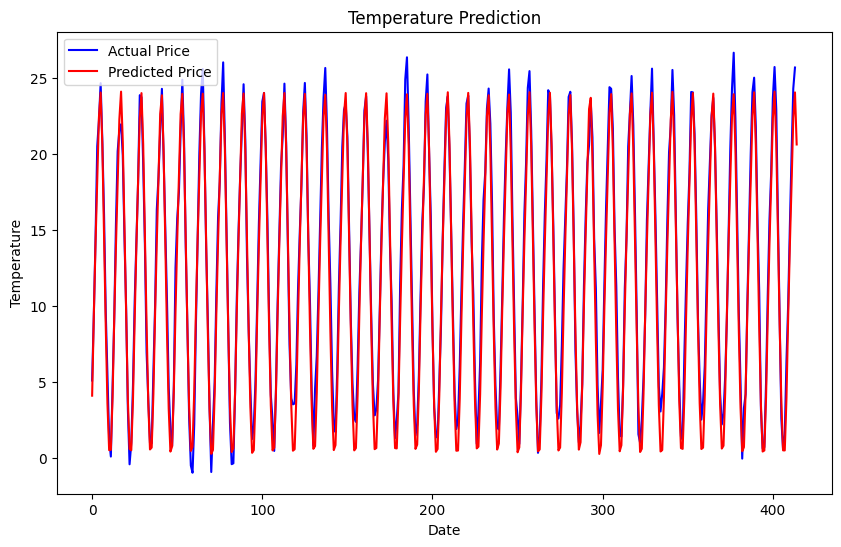

In [50]:
# Make predictions using the trained model
predictions = model.predict(test_features)
predictions = scaler.inverse_transform(predictions)

# Plot actual vs predicted stock prices
plt.figure(figsize=(10, 6))
plt.plot(test_set, color='blue', label='Actual Price')
plt.plot(predictions, color='red', label='Predicted Price')
plt.title('Temperature Prediction')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()